# here graphs of non-spatial nature are produced

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# graphs for all WWTPS

In [2]:
# read non=spatial data for introduction
data=pd.read_excel('final/database.xlsx')
data.year=data.year.astype(int)


In [3]:
mask1=data.year<2077
mask2=data.year>1899
data=data[(mask1 & mask2)]
data.year.min()

1905

# show construction history
## is average meaningful?

In [4]:
data_all=data.groupby(['BL','year']).count().reset_index()
data_all=data_all.pivot('year','BL','PE')
#z['average']=z.mean(axis=1)



Text(0.5, 1.0, 'Temporal Distribution Of WWTPSUp To 500 PEs')

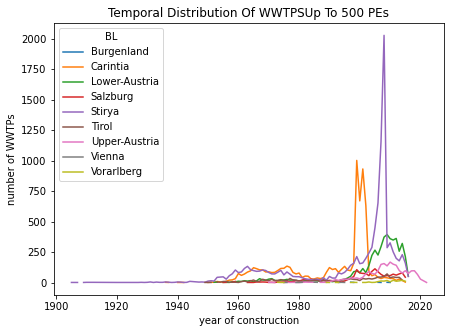

In [5]:
fig, ax= plt.subplots(1, figsize=(7,5))
lines=data_all.plot(ax=ax)
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')
ax.set_title('temporal distribution of'.title() +' WWTPS'+'up to 500 '.title()+'PEs')


# show only recent history

In [6]:
mask2=data.year>1993
only_recent=data[(mask2)]
only_recent=only_recent.groupby(['BL','year']).count().reset_index()
only_recent=only_recent.pivot('year','BL','PE')
#z['average']=z.mean(axis=1)

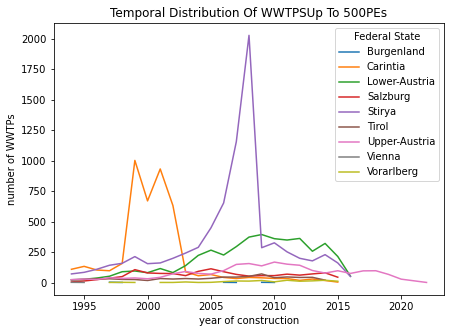

In [7]:
fig, ax= plt.subplots(1, figsize=(7,5))
only_recent.plot(ax=ax)
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')
ax.set_title('temporal distribution of'.title() +' WWTPS'+'up to 500'.title()+'PEs')
ax.legend(title='Federal State')

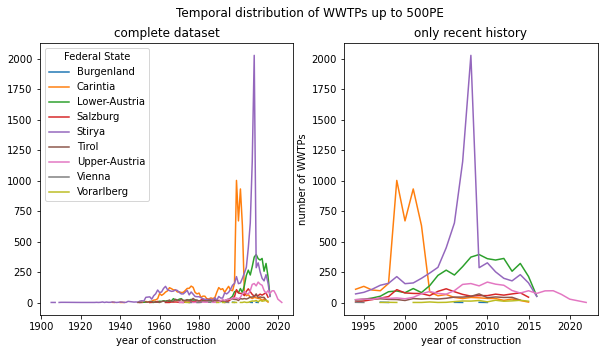

In [8]:
fig, ax= plt.subplots(1,2 ,figsize=(10,5))
data_all.plot(ax=ax[0])
only_recent.plot(ax=ax[1], legend=False)
plt.ylabel('number of WWTPs')
ax[0].set_xlabel('year of construction')
ax[1].set_xlabel('year of construction')
ax[0].set_title('complete dataset')
ax[1].set_title('only recent history')
plt.suptitle('temporal distribution of'.capitalize() +' WWTPs'+' up to 500'+'PE')
ax[0].legend(title='Federal State')
plt.savefig('graphs/temporal.png', bbox_inches='tight' )

In [10]:
only_major=data_all.drop(columns=['Burgenland', 'Vienna', 'Vorarlberg'])
only_recent_major=only_recent.drop(columns=['Burgenland', 'Vienna', 'Vorarlberg'])

In [11]:
only_major

BL,Carintia,Lower-Austria,Salzburg,Stirya,Tirol,Upper-Austria
year,,,,,,
1905,NaN,NaN,NaN,1.0,NaN,325.0
1906,NaN,NaN,NaN,1.0,NaN,NaN
1907,NaN,NaN,NaN,1.0,NaN,NaN
1908,NaN,1.0,NaN,NaN,NaN,NaN
1909,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...
2017,NaN,NaN,NaN,NaN,NaN,96.0
2018,NaN,NaN,NaN,NaN,NaN,97.0
2019,NaN,NaN,NaN,NaN,NaN,67.0


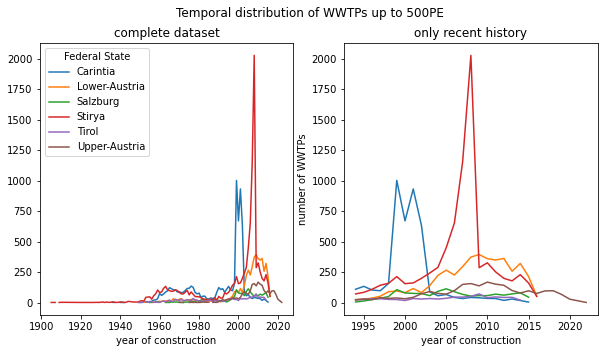

In [12]:
fig, ax= plt.subplots(1,2 ,figsize=(10,5))
only_major.plot(ax=ax[0])
only_recent_major.plot(ax=ax[1], legend=False)
plt.ylabel('number of WWTPs')
ax[0].set_xlabel('year of construction')
ax[1].set_xlabel('year of construction')
ax[0].set_title('complete dataset')
ax[1].set_title('only recent history')
plt.suptitle('temporal distribution of'.capitalize() +' WWTPs'+' up to 500'+'PE')
ax[0].legend(title='Federal State')
plt.savefig('graphs/temporal.png', bbox_inches='tight' )

# put into size categories

In [30]:
small=data[data.PE<=50]
medium=data[data.PE>50]
sizes=[small,medium]


In [28]:
def temp_graph(sizes):
    for size in sizes:
        groupBL=size.groupby(['BL','year']).count().reset_index()
        table=groupBL.pivot('year','BL','PE')

        fig, ax= plt.subplots(1, figsize=(7,5))
        lines=table.plot(ax=ax)
        plt.ylabel('number of WWTPs')
        plt.xlabel('year of construction')


# main exapnsion at same time from 1990
# stiria invested in small, while NOE in medium


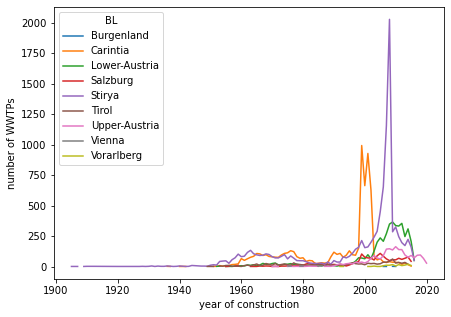

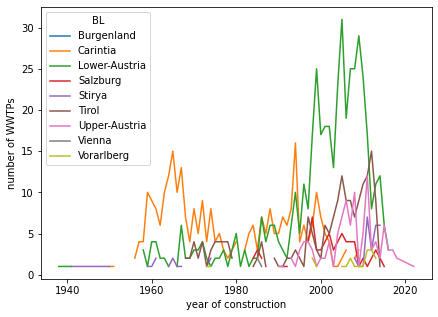

In [29]:
temp_graph(sizes)

# by tech_type
## have some data problem: 0s and un-unified categories

# PE workflow

In [2]:
data=gpd.read_file('final/complete.geojson')

In [135]:
#PE workflow
data_BL=data.groupby('BL').sum().reset_index()#[['BL','PE_nonitri_tot','sum_PE_tot','no_nitri_tot','freq_tot']]
data_BL['%BL_PE_nonitri']=data_BL.PE_nonitri_tot/data_BL.sum_PE_tot*100
data_BL['%BL_PE_nonitri_small']=data_BL.PE_nonitri_small/data_BL.sum_PE_tot*100
data_BL['%BL_PE_nonitri_medium']=data_BL.PE_nonitri_medium/data_BL.sum_PE_tot*100

#number of infra workflow
data_BL['%BL_nonitri']=data_BL.no_nitri_tot/data_BL.freq_tot*100
data_BL['%BL_nonitri_small']=data_BL.no_nitri_small/data_BL.freq_tot*100
data_BL['%BL_nonitri_medium']=data_BL.no_nitri_medium/data_BL.freq_tot*100

In [136]:
data_BL

,BL,%PE_nonitri_medium,%PE_nonitri_small,%PE_nonitri_tot,%no_nitri_medium,%no_nitri_small,%no_nitri_tot,GKZ,PE_nonitri_medium,PE_nonitri_small,...,no_nitri_tot,sum_PE_medium,sum_PE_small,sum_PE_tot,%BL_PE_nonitri,%BL_PE_nonitri_small,%BL_PE_nonitri_medium,%BL_nonitri,%BL_nonitri_small,%BL_nonitri_medium
0,Carintia,11124.793282,18649.670312,21577.956706,11220.000000,21096.578643,22053.547821,13906191,22326.666667,17332.066667,...,2335.0,37909.066667,59923.493151,97832.559817,40.537356,17.716051,22.821305,33.111174,30.473625,2.637550
1,Lower-Austria,3368.034003,10451.005004,11628.010044,3483.333333,10683.085065,11986.084281,40170236,5338.000000,3371.000000,...,393.0,85125.000000,38905.000000,124030.000000,7.021688,2.717891,4.303797,9.109875,8.113120,0.996755
2,Salzburg,702.293130,4736.878604,4447.797708,716.666667,5737.124294,5554.005042,14468651,1293.666667,3018.333333,...,308.0,10076.133333,20260.826667,30336.960000,14.213685,9.949360,4.264325,18.032787,17.447307,0.585480
3,Stirya,2929.411765,22064.242496,22975.168398,2933.333333,30250.812888,30616.645909,76818034,3102.000000,12479.000000,...,2129.0,7242.000000,79653.000000,86895.000000,17.930836,14.361010,3.569826,20.593925,20.255369,0.338557
4,Tirol,3020.559928,9051.393117,9043.494374,3144.837662,15019.449323,14695.230370,18845149,6575.333333,3745.866667,...,735.0,23677.693333,8707.533333,32385.226667,31.870087,11.566591,20.303496,56.800618,51.313756,5.486862
5,Upper-Austria,100.000000,7685.426799,7172.474979,100.000000,8704.763104,8458.990129,27021586,200.000000,2689.000000,...,368.0,20742.000000,27430.000000,48172.000000,5.997260,5.582081,0.415179,13.976453,13.938473,0.037979


In [67]:
data[data.BL=='Upper-Austria'].no_nitri_tot.sum()

2265.0

### number of WWTPS

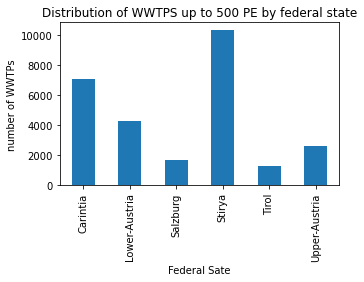

In [5]:
#number of infra
fig, ax= plt.subplots(1, figsize=(5,3))
data_BL.plot.bar(x='BL',y=['freq_tot'], ax=ax)
plt.ylabel('number of WWTPs')
plt.xlabel('Federal Sate')
ax.set_title('distribution of'.capitalize() +' WWTPS'+' up to 500'+' PE'+' by federal state')
ax.get_legend().remove()
plt.savefig('graphs/freq_BL.png', bbox_inches='tight')



### number of PEs

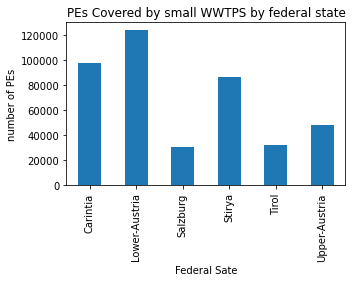

In [6]:
fig, ax= plt.subplots(1, figsize=(5,3))
data_BL.plot.bar(x='BL',y='sum_PE_tot', ax=ax)
plt.ylabel('number of PEs')
plt.xlabel('Federal Sate')
ax.set_title('PEs '+ 'covered by small'.capitalize() +' WWTPS by federal state')
ax.get_legend().remove()
plt.savefig('graphs/PE_sum_BL.png', bbox_inches='tight')


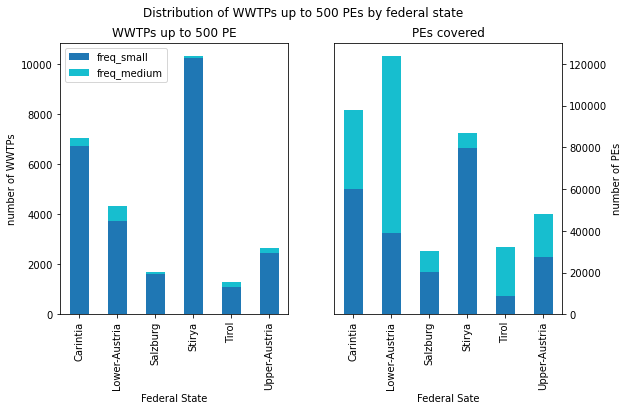

In [65]:
fig, ax= plt.subplots(1,2, figsize=(9,5))
data_BL.plot(kind='bar', y=['sum_PE_small','sum_PE_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax[1])
ax[1].set_ylabel('number of PEs')
ax[1].set_xlabel('Federal Sate')
ax[1].set_title('PEs '+ 'covered')
ax[1].get_legend().remove()
fig.suptitle('Distribution of WWTPs up to 500 PEs by federal state')
data_BL.plot(kind='bar', y=['freq_small','freq_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax[0])
ax[0].set_ylabel('number of WWTPs')
ax[0].set_xlabel('Federal State')
ax[0].set_title('WWTPs'+' up to 500'+' PE')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
#ax[0].get_legend().remove()
plt.savefig('graphs/freq_BL+sum_PE.png', bbox_inches='tight')

# see size difference

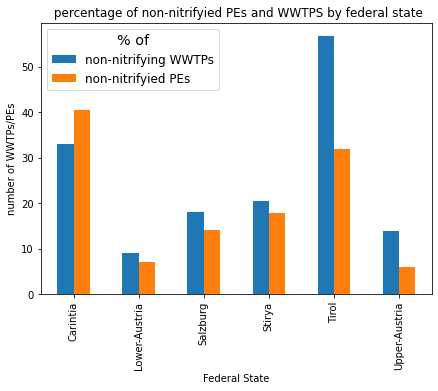

In [12]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(7,5))
data_BL.plot.bar(x='BL', y=['%BL_nonitri','%BL_PE_nonitri'],ax=ax)
plt.ylabel('number of WWTPs/PEs')
plt.xlabel('Federal State')
ax.set_title(' Percentage of Non-nitrifyied'.capitalize() +' PEs and WWTPS by federal state')
ax.legend(['non-nitrifying WWTPs','non-nitrifyied PEs'], title='% of', title_fontsize='x-large', fontsize='large')
plt.savefig('graphs/%nonitri+%PE_nonitri_BL.png', bbox_inches='tight')



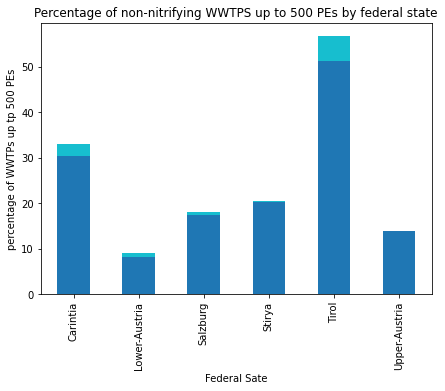

In [137]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(7,5))
data_BL.plot(kind='bar', y=['%BL_nonitri_small','%BL_nonitri_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax)
plt.ylabel('percentage of WWTPs up tp 500 PEs')
plt.xlabel('Federal Sate')
ax.set_title('percentage of non-nitrifying'.capitalize() +' WWTPS up to 500 PEs by federal state')
ax.legend(['non-nitrifying WWTPs'], title='% of ', title_fontsize='x-large', fontsize='large')
ax.get_legend().remove()

plt.savefig('graphs/%nonitri.png', bbox_inches='tight')

# get population

In [115]:
#aadding POP variable 
pop=pd.read_excel('DATA/einwohnerzahl_nach_ortschaften_1.1.2021_gebietsstand_1.1.2021.xlsx', header=1)
pop.rename(columns={'Ortschaftsname':'KG','Gemeindename':'PG','Bundesland':'BL','Bevölkerung\nam 1.1.2021':'Pop'},inplace=True)
#merge on BL
pop=pop.groupby('BL').sum().reset_index()
pop.drop(index=4,inplace=True)
pop=pop[['BL','Pop']]
#rename BLS
pop.replace({'Oberösterreich':'Upper-Austria','Steiermark':'Stirya','Niederösterreich':'Lower-Austria','Tirol':'Tirol','Kärnten':'Carintia',}, inplace=True)
BL=data.groupby('BL').sum().reset_index()
pop_BL=pd.merge(BL,pop,on='BL', how='outer')
pop_BL.loc['Total']= pop_BL.sum()
pop_BL['Pop_coverage']=pop_BL.sum_PE_tot/pop_BL.Pop*100
pop_BL['Pop_coverage_no_nitri']=pop_BL.PE_nonitri_tot/pop_BL.Pop*100
pop_BL.loc['Total','BL']='Austria'




In [116]:
pop_BL['Pop_coverage_small']=pop_BL.sum_PE_small/pop_BL.Pop*100
pop_BL['Pop_coverage_medium']=pop_BL.sum_PE_medium/pop_BL.Pop*100
pop_BL['Pop_coverage_no_nitri_small']=pop_BL.PE_nonitri_small/pop_BL.Pop*100
pop_BL['Pop_coverage_no_nitri_medium']=pop_BL.PE_nonitri_medium/pop_BL.Pop*100

In [125]:

pop_BL.drop(index=[6,7,8], inplace=True)

# pop coverage

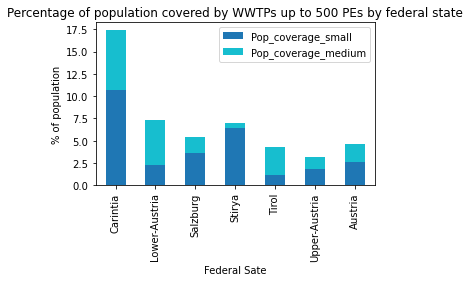

In [127]:
fig, ax= plt.subplots(1, figsize=(5,3))
pop_BL.plot(kind='bar', y=['Pop_coverage_small','Pop_coverage_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax)
                    
plt.ylabel('% of population')
plt.xlabel('Federal Sate')
ax.set_title('Percentage of population covered by'.capitalize() +' WWTPs up to 500 PEs by federal state')
plt.savefig('graphs/%pop_BL.png', bbox_inches='tight')


# pop coverage no nitri


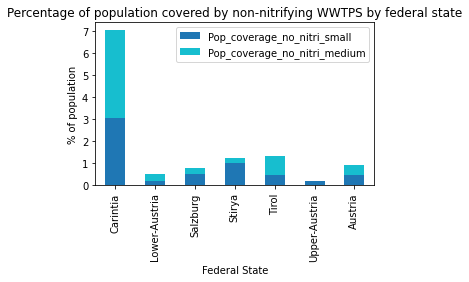

In [128]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(5,3))
pop_BL.plot(kind='bar', y=['Pop_coverage_no_nitri_small','Pop_coverage_no_nitri_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax)
plt.ylabel('% of population')
plt.xlabel('Federal State')
ax.set_title('percentage of population covered by non-nitrifying'.capitalize() +' WWTPS by federal state')
plt.savefig('graphs/%popnonitri_BL.png', bbox_inches='tight')


# graphs of unified dataset VS original Gunter
### freq, tech_type, PE